## Introduction

Outlier detection is one of the widely used method in any data science project as it's presence can lead to a **development of bad machine learning model**. Let's take a quick scenario of linear regression problem statement, where suppose you have to predict the weight of the person from the height. In general one with more height will have the more weight as well **(linear positive trend)** but what if rarely we have **3-4 person** who have very less weight but comparatively more height then that data will be treated as the **bad data or the outliers.** Which in the end would not be a good fit for our regression model.

There are various ways through which we can deal with the outliers though in this article we will have our complete focus on **Z-Score** method. Here we will talk about the **limitations of this method**, **When to use and when to prefer other methods**, and offcourse the **complete implementation using Python**.


## Limitations of Z-Score

Though Z-Score is highly efficient way of detecting and removing the outliers, yet we cannot use it with every type of data. When we said that we mean that it only work with the data which is completely or close to **normally distributed** which in turn stimulates that this method is not for **skewed** data either **left skew** or **right skew**, for the other data we have something known as **Inter quartile range (IQR)** method this we will cover in the very next article that too in depth.

Enough of the theory let's now jump to practically implement this method and see how we can **detect and remove the bad data** from the dataset to improve the model accuracy as the end result.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We are getting our stuffs ready by firstly importing all the essential libraries from Python's supported package. Here we have imported four main libraries that we will use during the execution part:

1. **Numpy:** For performing mathematical calculations by simplying the same from it's predefined functions
2. **Pandas**: Pandas is the data manipulation library which helps in playing with DataFrames.
3. **Matplotlib:** This is one of the most common library used for visualization that is closest to python backend.
4. **Seaborn:** Another visualization library that is better in terms of representation, look and feel but built on top of matplotlib.

In [2]:
df_org = pd.read_csv('placement.csv')
df_org.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


**Inference:** We are using the simple placement dataset for this article where we will take **cgpa** and **placement exam marks** as two columns and select one of the column which will show the **normal distribution** then will proceed further to remove outliers from that feature. Using the **head** function to show the top 5 rows.

In [3]:
df_org.shape

(1000, 3)

**Inference:** As **shape** function stimulates that we have **1000 rows** of data with **3 columns** -> (1000,3)

In [4]:
df_org.sample(5)

,cgpa,placement_exam_marks,placed
946,7.95,12.0,0
446,6.60,23.0,1
924,6.85,23.0,1
885,7.13,16.0,1
474,7.11,25.0,1


**Inference:** Like **head function** returns the top **5 rows** (by default) Similarly, **sample function** returns the random **sample of 'n' rows** depending on what value we are giving in the parameter. 

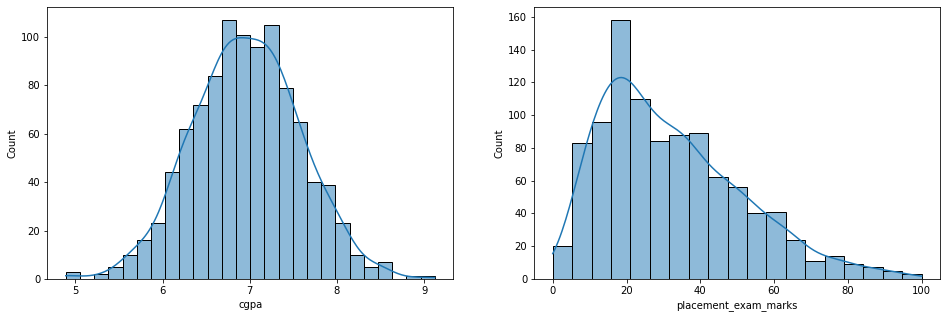

In [5]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df_org['cgpa'], kde=True)

plt.subplot(1,2,2)
sns.histplot(df_org['placement_exam_marks'], kde=True)

plt.show()

**Inference:** We chose **histplot** with **kernel density as True** graph for both **cgpa** and **placement_exam_marks** column so that we can get clear understanding that among both of them which one have the **normal distribution**.

From the graph we can clearly see that **cgpa** is almost right fit for the normal distribution or we can say it is forming the correct **bell curve**. Meanwhile the other one is slighlty **skewed** towards right. Hence, we are gonna take cgpa for our further analysis.

In [6]:
df_org['placement_exam_marks'].skew()

0.8356419499466834

In [7]:
df_org['cgpa'].skew()

-0.014529938929314918

**Inference:** We were lucky enough to spot the difference between normal distribution and skewed distriution from above graph but sometimes the graph might not give this clear understanding, for that we have the **skew function** from pandas which will give the **higher positive value** if the distribution seems to be **skewed** (**placement_exam_marks**) other wise it will return the quite **lower value even in negative** if it is not skewed at all (**cgpa**).

In [8]:
print("Mean value of cgpa",df_org['cgpa'].mean())
print("Standard deviation of cgpa",df_org['cgpa'].std())
print("Minimum value of cgpa",df_org['cgpa'].min())
print("Maximum value of cgpa",df_org['cgpa'].max())

Mean value of cgpa 6.96124000000001
Standard deviation of cgpa 0.6158978751323894
Minimum value of cgpa 4.89
Maximum value of cgpa 9.12


**Inference:** Here are some seperate statistical measures for **cgpa** which are printed out with an intention to compare the original values (from original data) to when the data will be **free of any outlier** with that the analysis will be evident and clear as well.

## Approach 

From here onwards our main task starts but before implemnting the same let's first dicuss the game plan and how we will approach to **deal with bad data using Z-Score:**

1. The very first step will be setting the **upper** and **lower** limit. This is the range which stimulates that **out of this range** every data point will be regarded as **outlier**. Let's see the formulae for both upper and lower limit.
    * **Upper:** Mean + 3 * standard deviation.
    * **Lower:** MEan - 3 * standard deviation.

In [9]:
print("Upper limit",df_org['cgpa'].mean() + 3*df_org['cgpa'].std())
print("Lower limit",df_org['cgpa'].mean() - 3*df_org['cgpa'].std())

Upper limit 8.808933625397177
Lower limit 5.113546374602842


**Inference:** In the output we can see that highest value is **8.80** while the lowest value is **5.11**. Hence any value out of this range is the **bad data point**

2. Second step is to detect **how many outliers are there in the dataset** based on the upper and lower limit that we set up just before.

In [10]:
df_org[(df_org['cgpa'] > 8.80) | (df_org['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


**Inference:** Now we are actually performing the **filtering using pandas** where we are passing in two condition keeping in mind that if either of the condition will be **True** then too our objective will be attained. In the output, we can see that it returned **5 rows** i.e. there are **5 outliers** in the dataset.

3. Now, we are gonna start with third and the last step, where we will finally **remove the detected outliers in step 2** using two techniques, we can either go for **Trimming** or **Capping**, we will discuss both the technique more closely seperately.

## Trimming

The first technique for dealing with outliers is **trimming** and this is regardless of what kind of data distribution you are working with, trimming is applicable and proven technique for most of the data types. In this technique we used to pluck out all the outliers by using the **filter condition**.

In [11]:
new_df_org = df_org[(df_org['cgpa'] < 8.80) & (df_org['cgpa'] > 5.11)]
new_df_org

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


**Inference:** So as we can see that we applied that condition where all the data should be in the range of our **upper and lower limit** and as a result instead of **1000 rows** it returned **995 rows** which indicates that we have sucessfully **removed 5 outliers**.

## Capping

Capping is another technique for dealing with the bad data points, it is usefull when we have lot of outliers and **it is not good to remove a good amount of data** from the dataset in that case capping comes into picture as it don't remove them instead it brings back those data points **within the range** that we specified according to our **Z-Score value**.

In [12]:
upper_limit = df_org['cgpa'].mean() + 3*df_org['cgpa'].std()
lower_limit = df_org['cgpa'].mean() - 3*df_org['cgpa'].std()

df_org['cgpa'] = np.where(
    df_org['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df_org['cgpa']<lower_limit,
        lower_limit,
        df_org['cgpa']
    )
)

**Inference:** Here also first thing is to set the **upper and lower bound**. Then comes the part of **np.where** function that will help to implement the logic behind capping, the basic syntax is as, **np.where(condition, True, False)** i.e. if the condition is true then that data point will be getting the **upper limit value** (within range) if not it will go to check lower limit and if that's True then it will give that data point **lower limit value** (within range)

In [13]:
df_org.shape

(1000, 3)

**Inference:** As we did capping so no data was lost and we still have **1000 rows**.

In [14]:
df_org['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

**Inference:** Now if we compare the minimum and maximum values of before outlier removal and after so we can see that **minimum value is increased** and **maximum value is decreased**.

## Conclusion

In this article we discussed about one of the effecient way of dealing and removing the bad data for our further analysis i.e. removing outliers which is also known as **Anamoly detection**. Here we saw how statistical measures such as Z-Score can help in dealing with such problems.


1. Firstly we started off by **importing libraries**, **reading the dataset** and having a brief look over it. Before that we also discussed the **limitations of Z-Score** and when we should prefer it.

2. Then we analyse the data distribution of the columns to choose the normally distributed column as Z-Score is applicable on that type only, as a result **cgpa** seems to be fit for further analysis.

3. At the last we discussed about two methods via we can do the **Anamoly detection** and these were **Trimming** (removimg outliers) and **Capping** (imputing outliers).